In [1]:
# imports
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import missingno as msno
from sklearn.impute import KNNImputer


import string
import os

In [19]:
# installs
# !pip install numpy matplotlib pandas missingno

# data preparation

In [2]:
datapath = './data'
fileName = 'agriRuralDevelopment.csv'

df_oig = pd.read_csv(os.path.join(datapath, fileName), index_col=False)

## removing aggregated values

In [3]:
shape_before = df_oig.shape
aggregated_list = ["Arab World" ,
        "Caribbean small states", 
        "Central Europe and the Baltics", 
        "East Asia & Pacific",
        "European Union",
        "Europe & Central Asia",
        "Latin America & Caribbean",
        "Middle East & North Africa",
        "North America",
        "Small states",
        "South Asia",
        "Sub-Saharan Africa",
        "World"
        ]

df = df_oig.loc[df_oig["Country Name"].apply(lambda x : x not in aggregated_list)].reset_index(drop = True)
df.head()
shape_after = df.shape

print(shape_before, shape_after, shape_before[0] - shape_after[0])

(13908, 55) (13115, 55) 793


<AxesSubplot: >

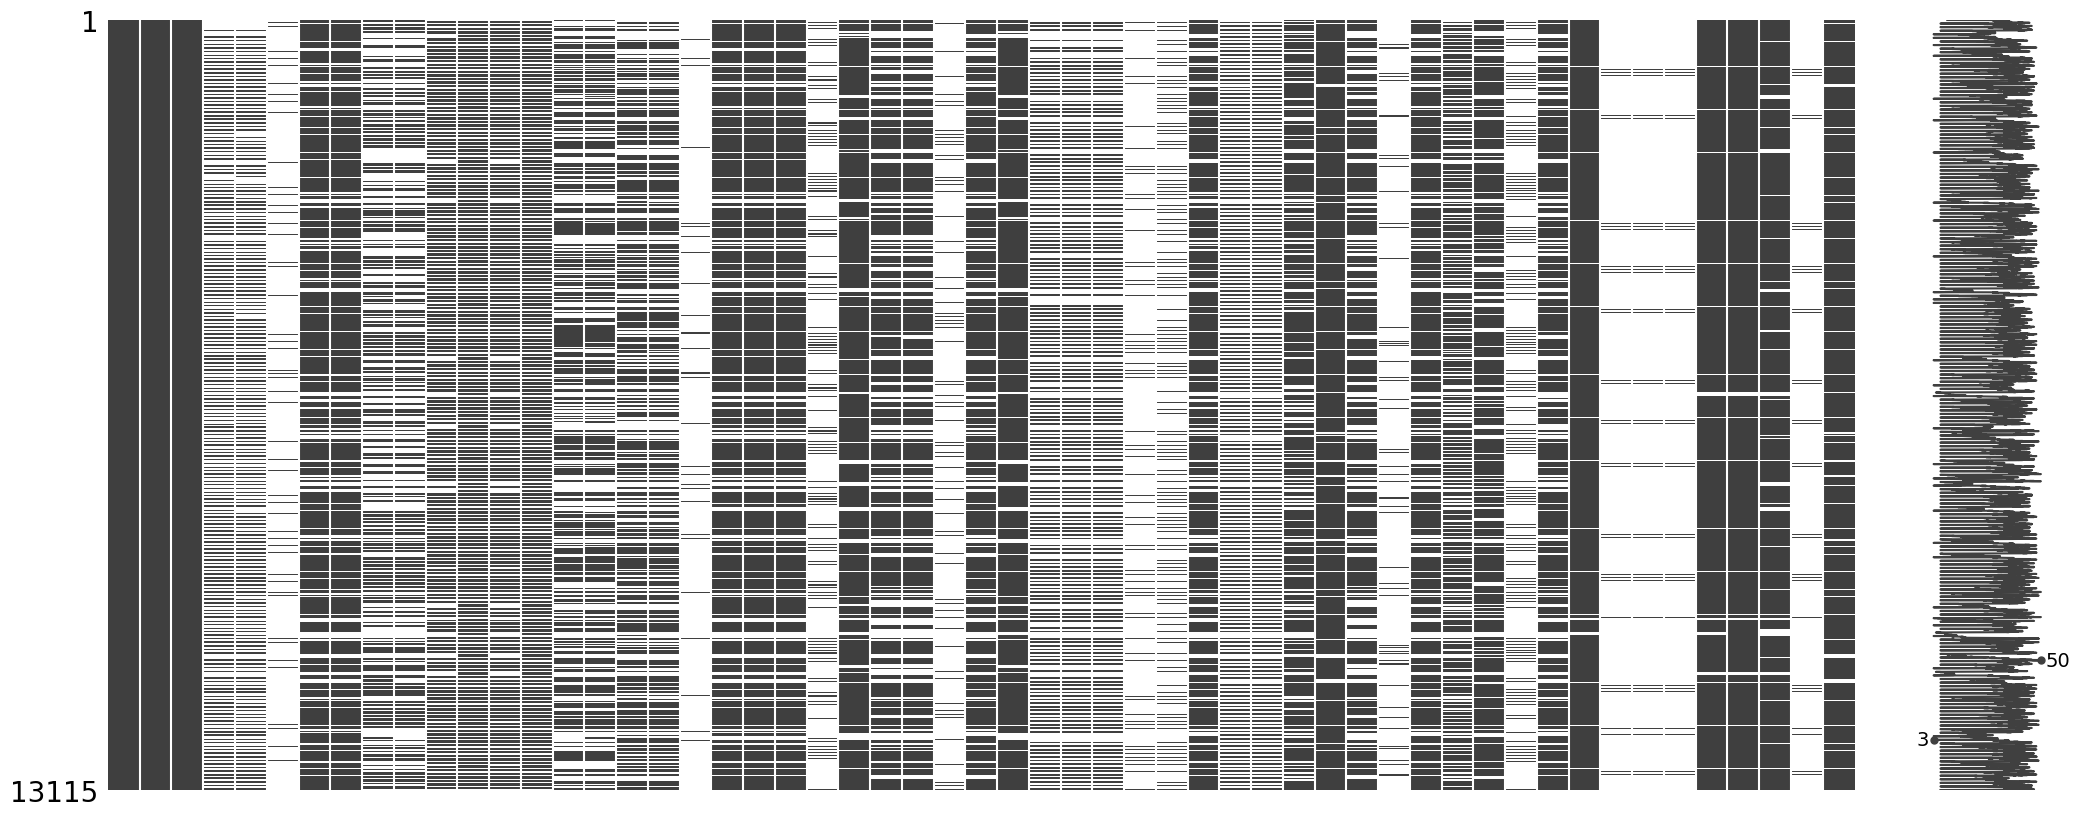

In [4]:
msno.matrix(df)

## selecting well represented columns

<AxesSubplot: >

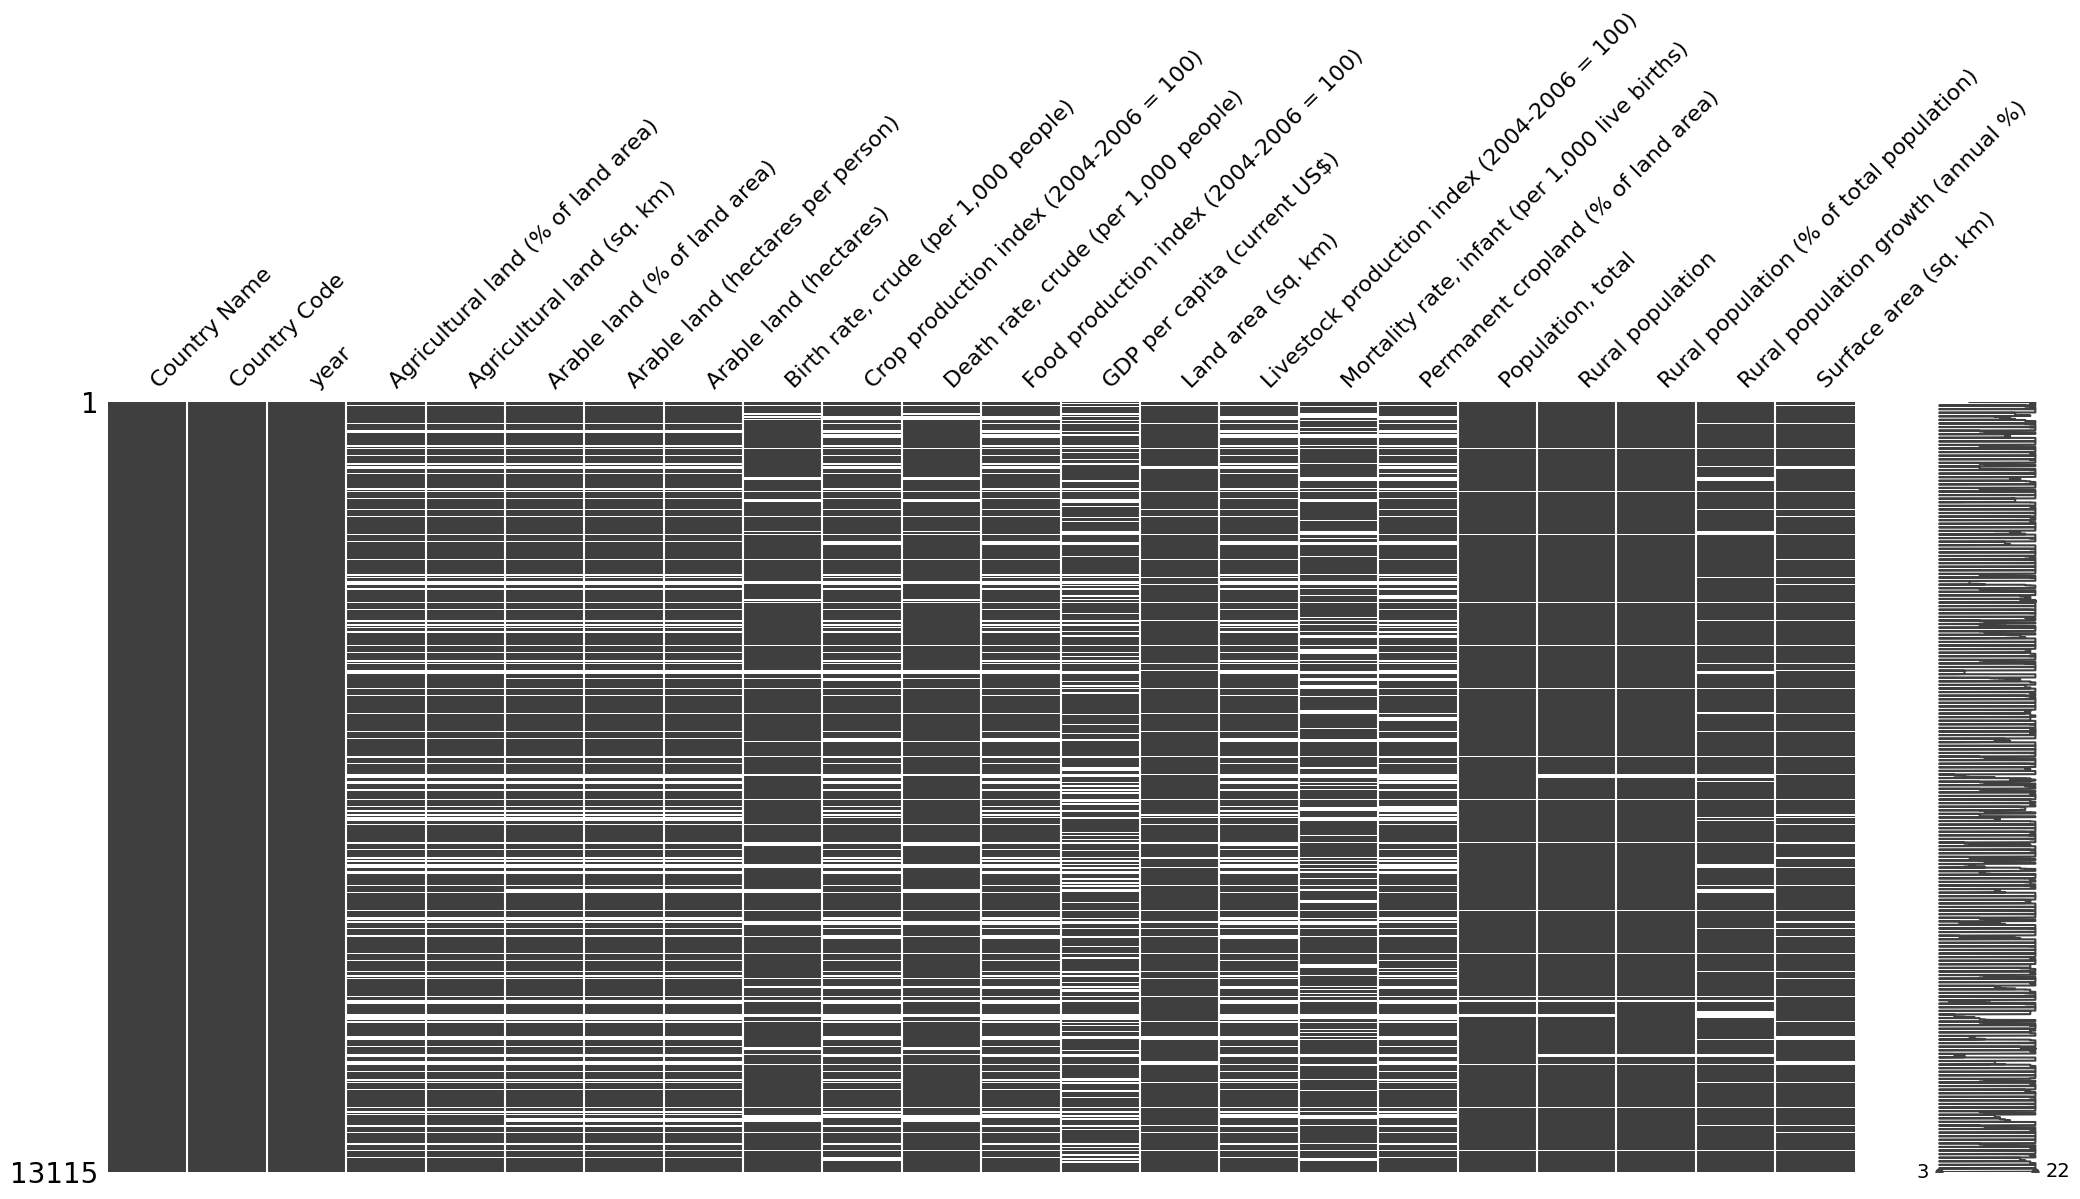

In [5]:
criteria = df[:].isna().sum() < 13115 * 0.3 # allowed nans
df_selected = df[criteria.index[criteria]]
msno.matrix(df_selected)

<AxesSubplot: >

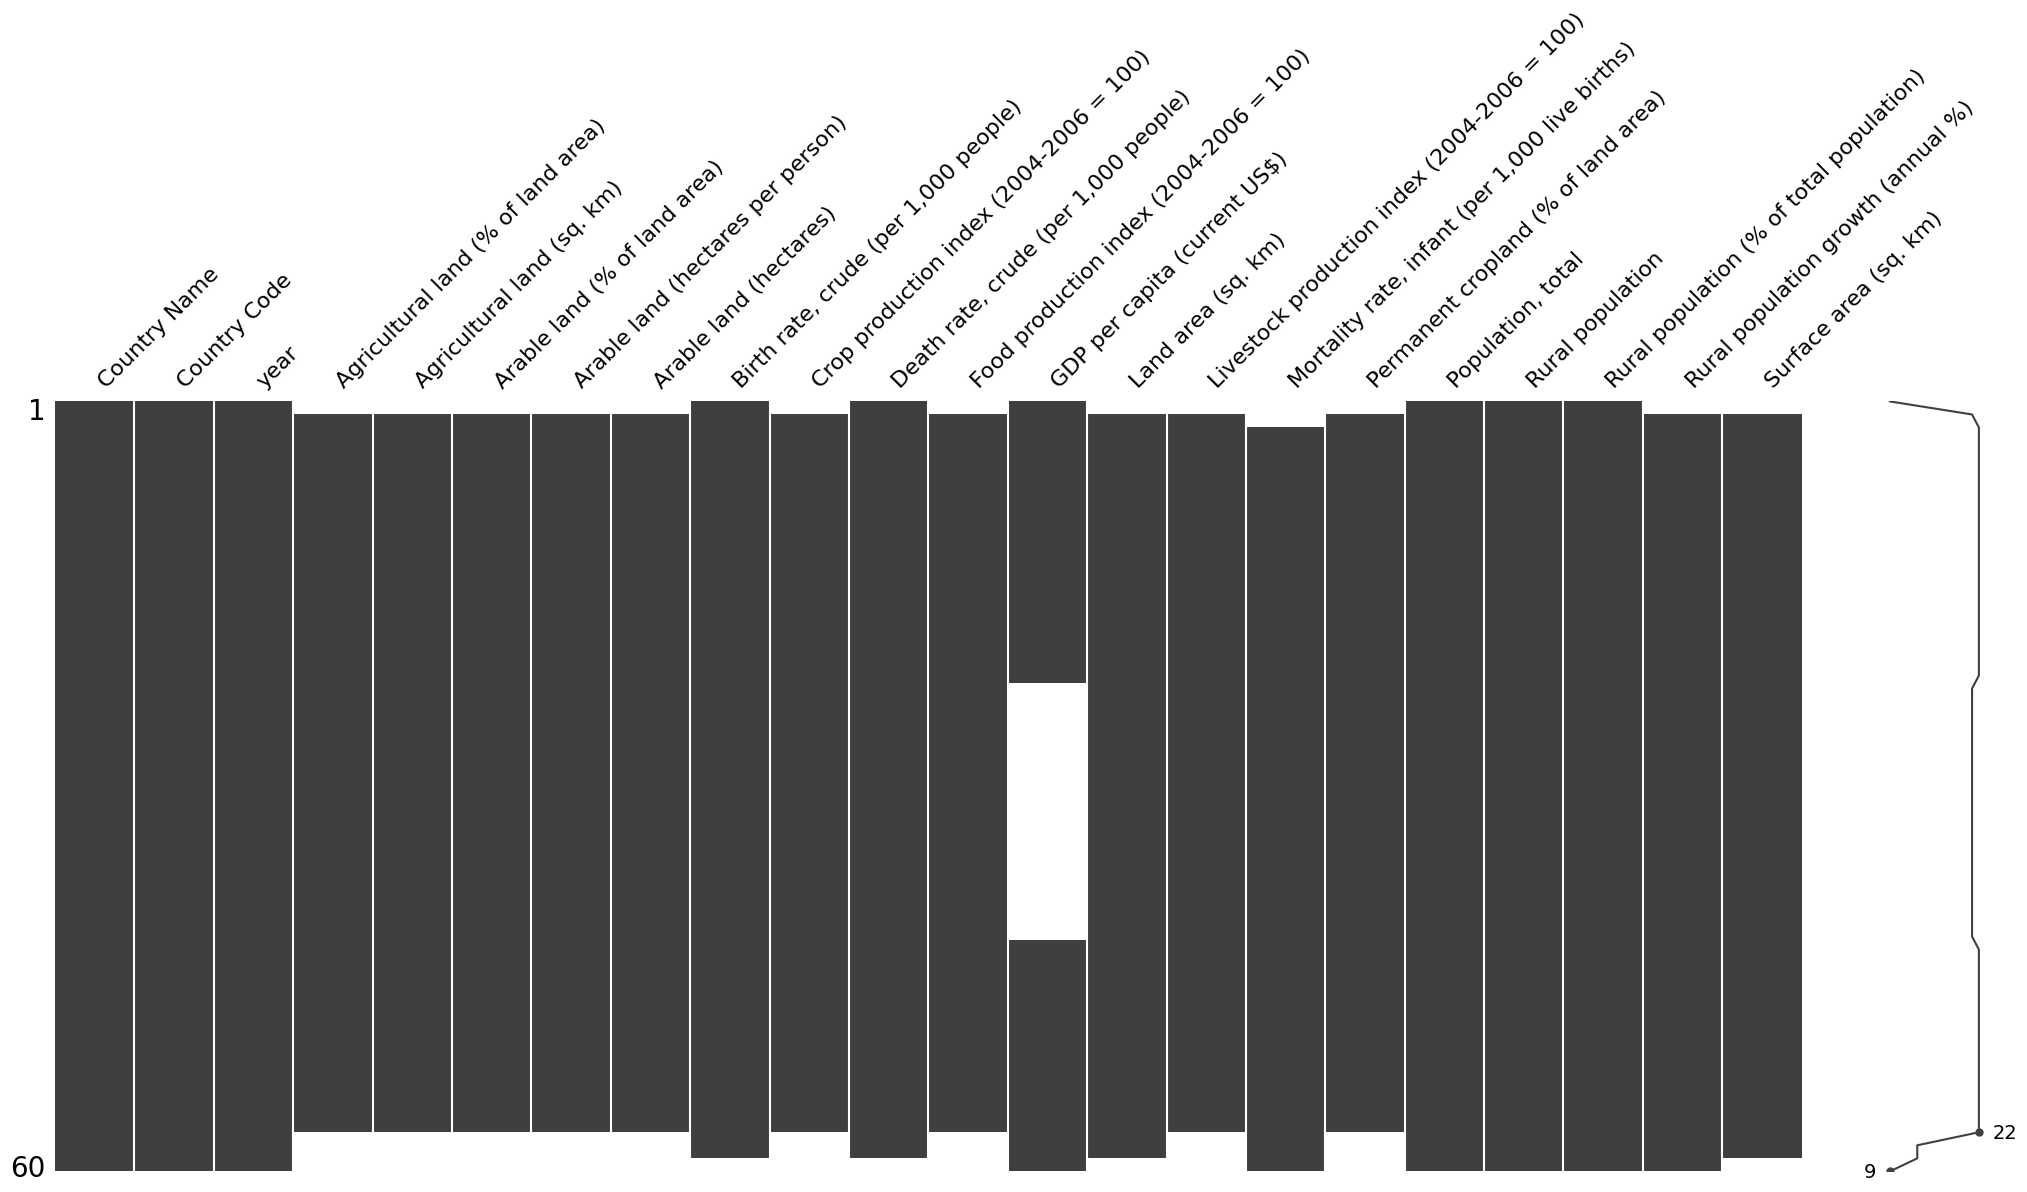

In [6]:
df_selected.iloc[0:60]["Country Name"]
sample_df = df_selected.iloc[0:60]
msno.matrix(sample_df)

In [7]:
def myImputationFunction(colm):
    sol = colm.interpolate(method='linear')
    sol = sol[::-1]
    sol = sol.interpolate(method='linear')
    sol = sol[::-1]
    colm = sol
    return colm

<AxesSubplot: >

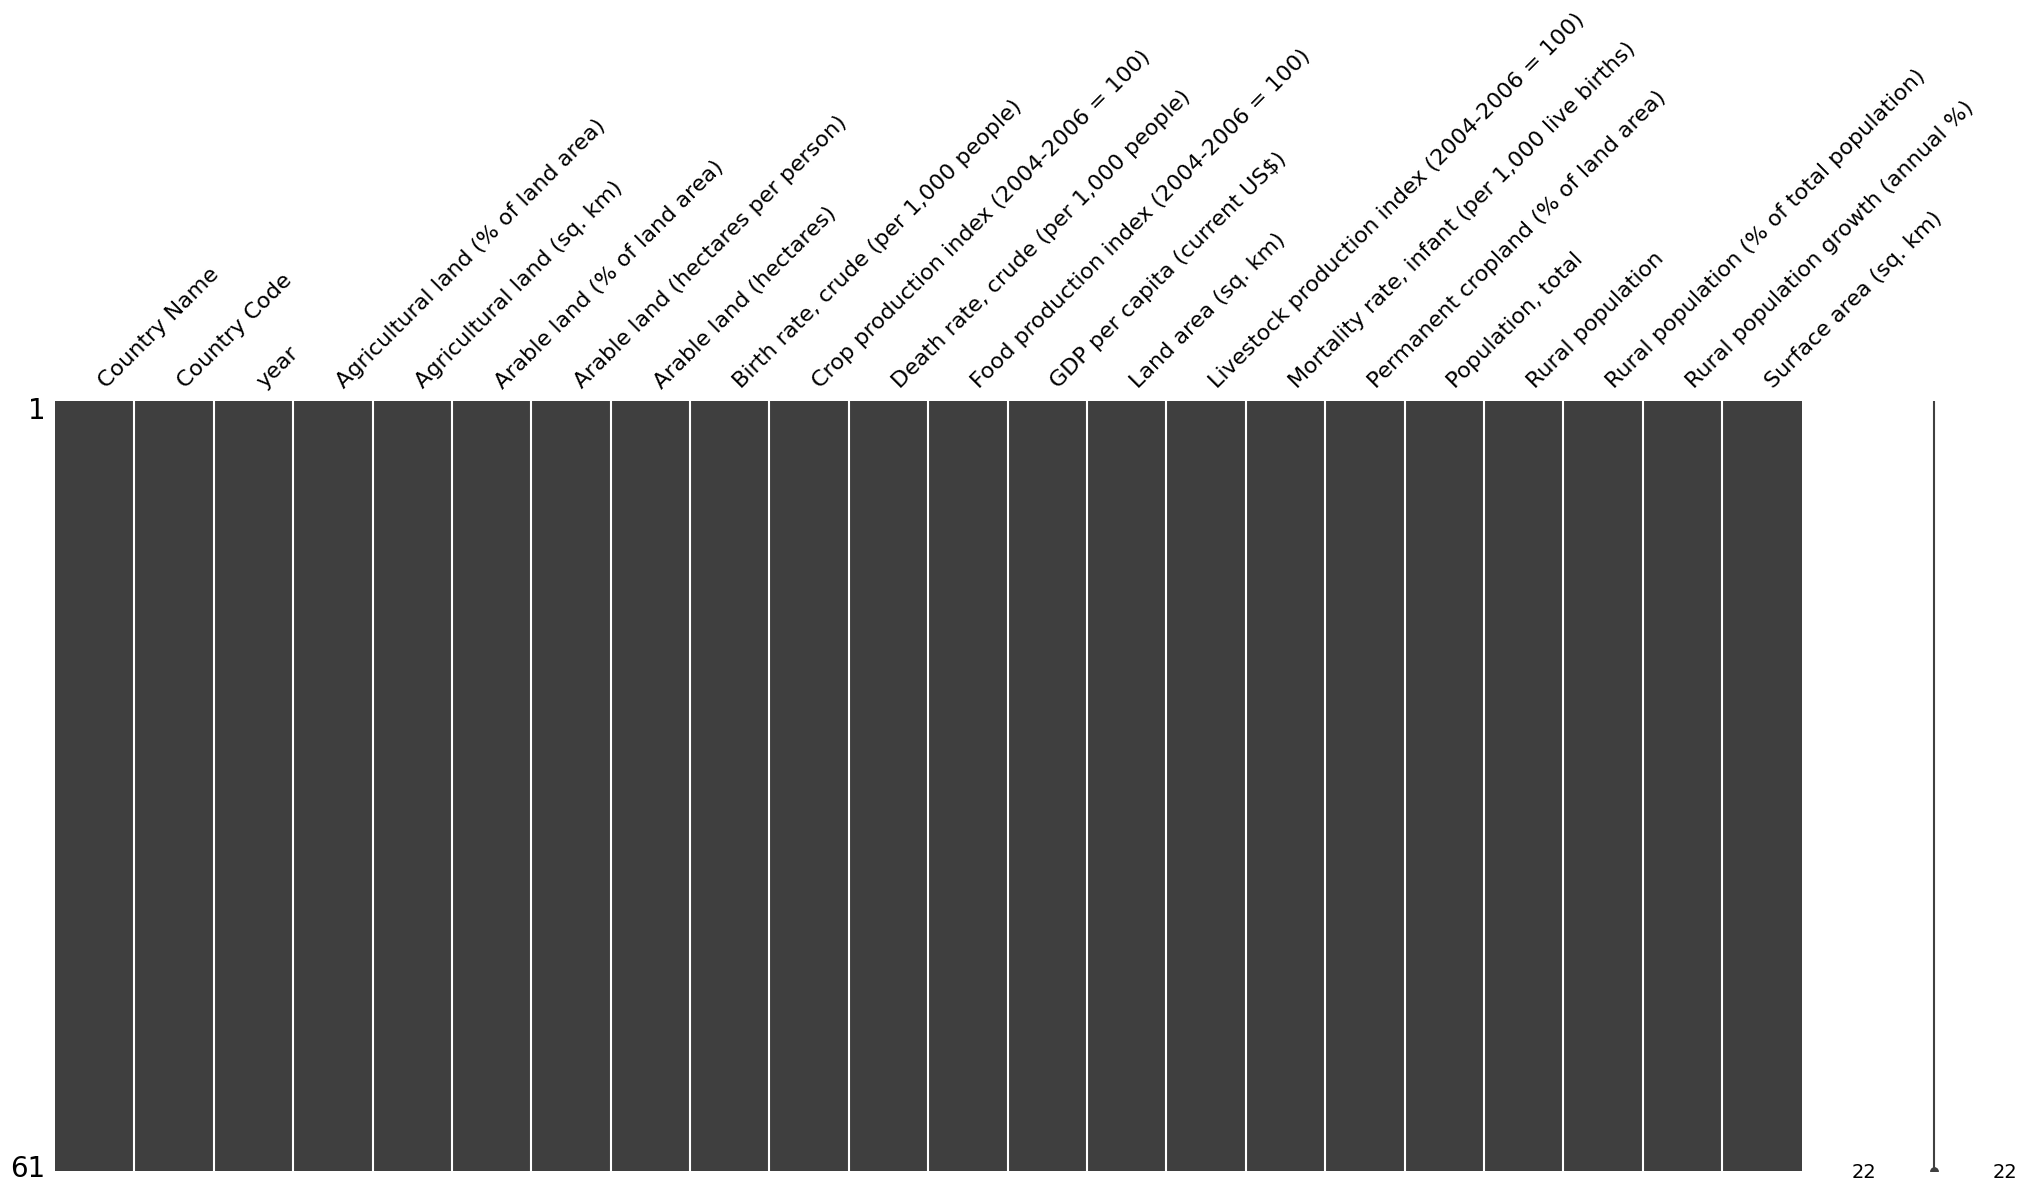

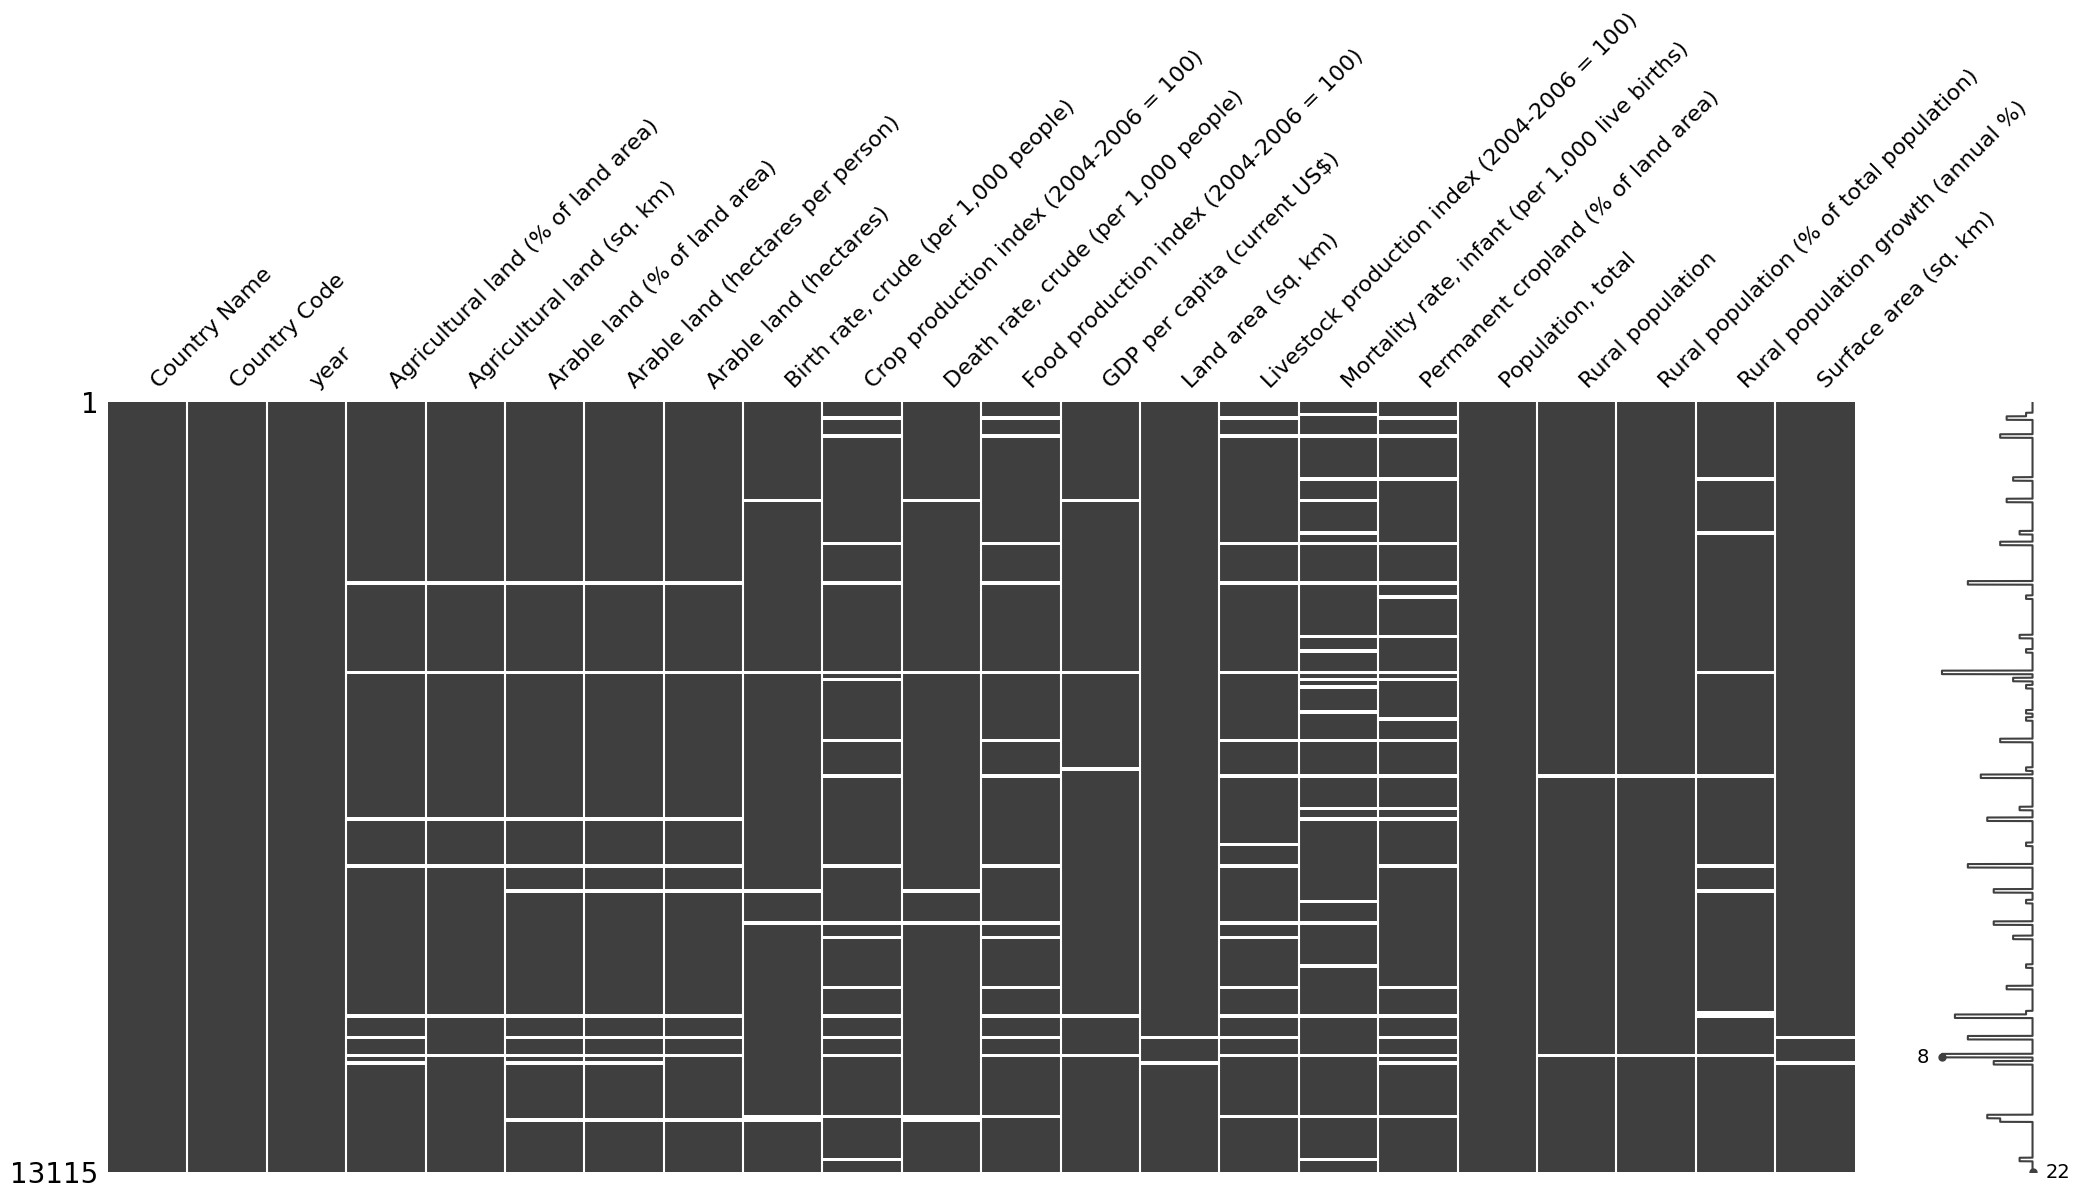

In [8]:

df_imputed = df_selected.copy()

country_names = sorted(list(set(df_imputed["Country Name"])))
for cn in country_names:
    selected = df_imputed.loc[df_imputed["Country Name"] == cn,:]
    solution = df_imputed.loc[df_imputed["Country Name"] == cn,:].apply(lambda x: myImputationFunction(x), axis=0)
    df_imputed.loc[df_imputed["Country Name"] == cn,:] = solution

msno.matrix(df_imputed.loc[df_imputed["Country Name"] == country_names[0],:])
msno.matrix(df_imputed)

# Data Imputation Visualization

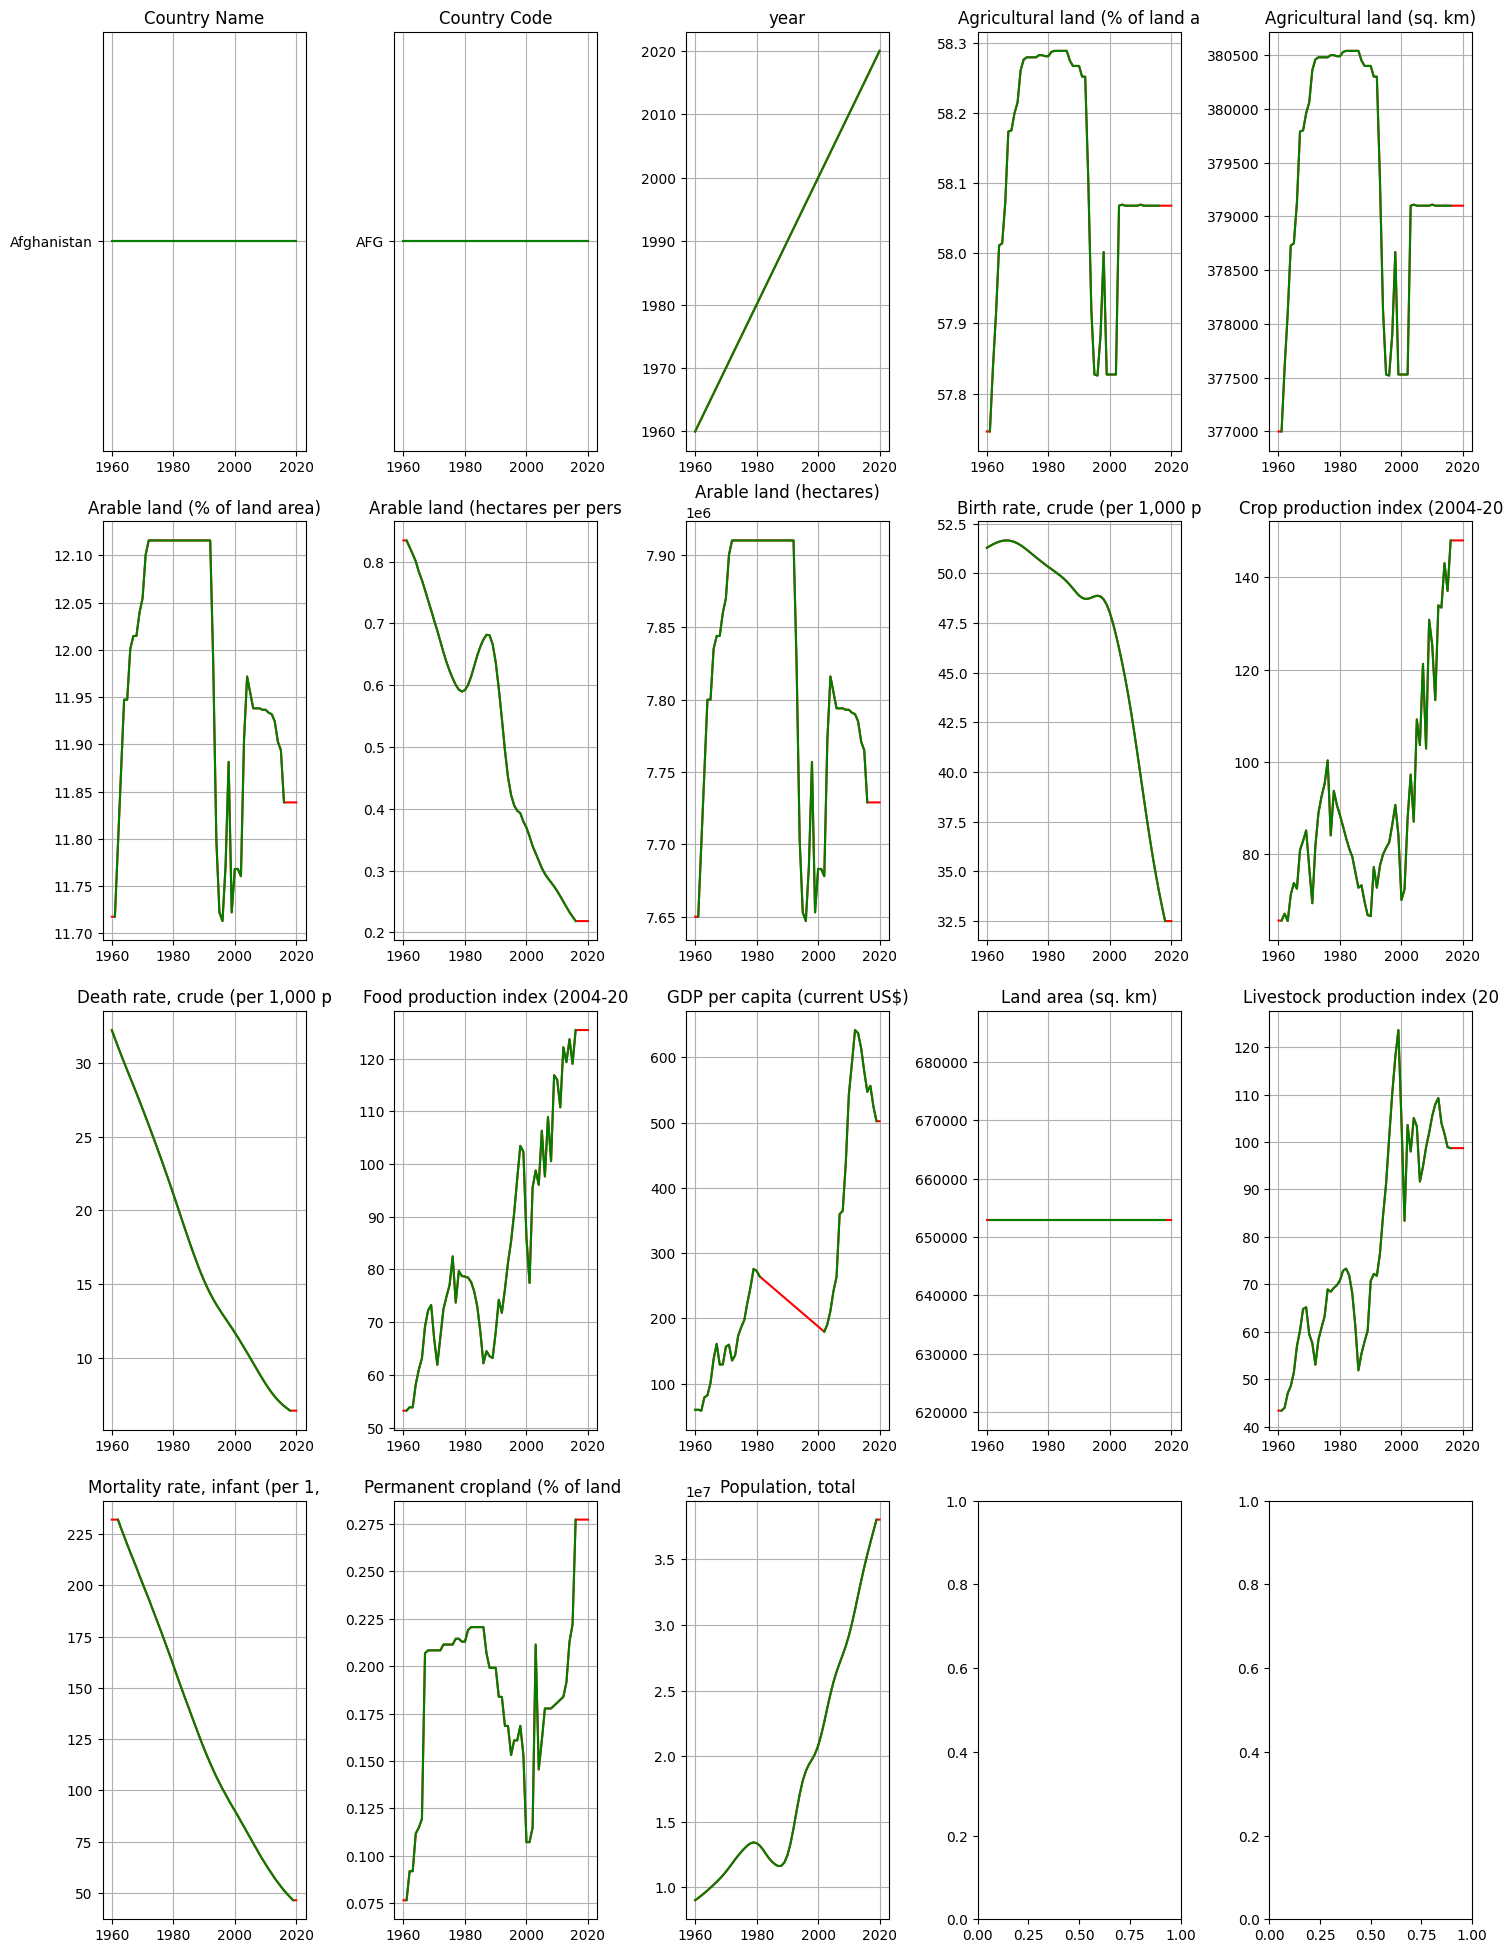

In [11]:
country = country_names[0]
df_country_oig = df_selected.loc[df_selected["Country Name"] == country,:]
df_country_imputed = df_imputed.loc[df_imputed["Country Name"] == country,:]

time = df_country_imputed.iloc[:,2]
names = df_country_imputed.columns.values

fig, axs = plt.subplots(4,5, figsize=(15,20))
fig.tight_layout(pad=3.0)
for i, nam in enumerate(names[3:-1]):
    ax = axs[i//5, i%5]
    ax.set_title(names[i][0:30])
    ax.plot(time, df_country_imputed.iloc[:,i], color='red')
    ax.plot(time, df_country_oig.iloc[:,i], color='green')
    ax.set_axisbelow(True)
    ax.grid()


# Data Distribution Visualisation

In [15]:
df_oig.shape

(13908, 55)

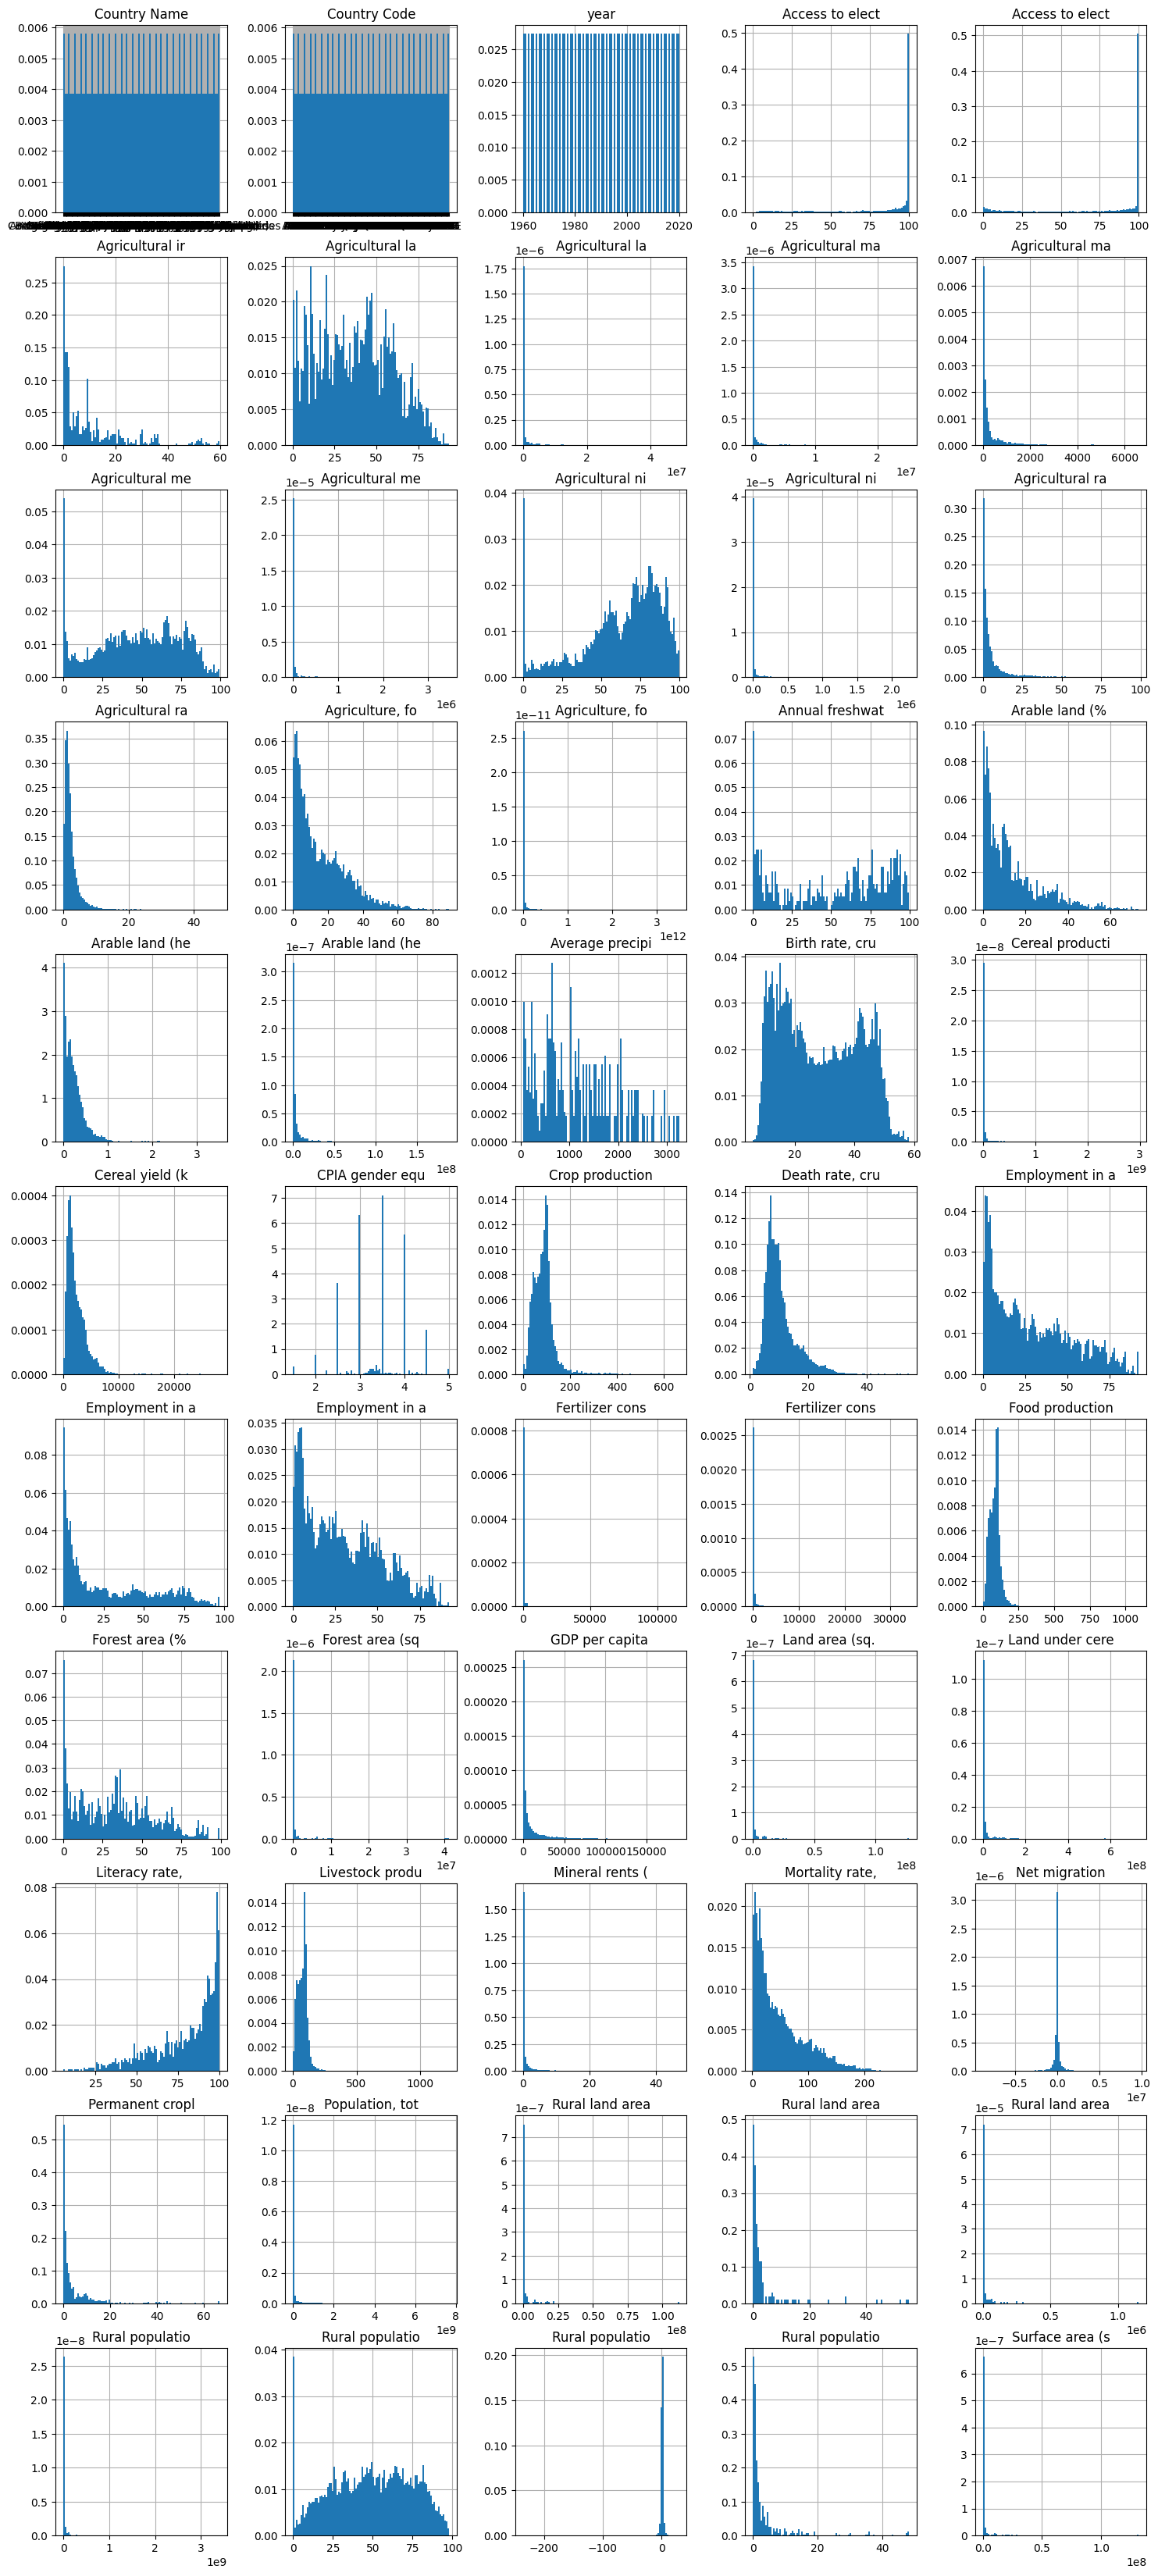

In [16]:
# varable distribution overview
alpha = 0.025

all_attributes_names = df_oig.columns.values

fig, axs = plt.subplots(11,5, figsize=(15,33))
fig.tight_layout(pad=2.0)
# fig.suptitle("distribution overview per feature")
for i, nam in enumerate(df_oig.columns.values):
    ax = axs[i//5, i%5]
    ax.set_title(all_attributes_names[i][0:15])
    ax.hist(df_oig[nam], bins=100, density=True)
    ax.set_axisbelow(True)
    ax.grid()


# Data Correlation Visualisation

/var/folders/3c/t08nl7456zl9jcq07p2xt7x80000gn/T/ipykernel_48328/3724694586.py:21: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df_short.corr(), annot=False, vmax=1, vmin=-1)


<AxesSubplot: title={'center': 'Correlation plot'}>

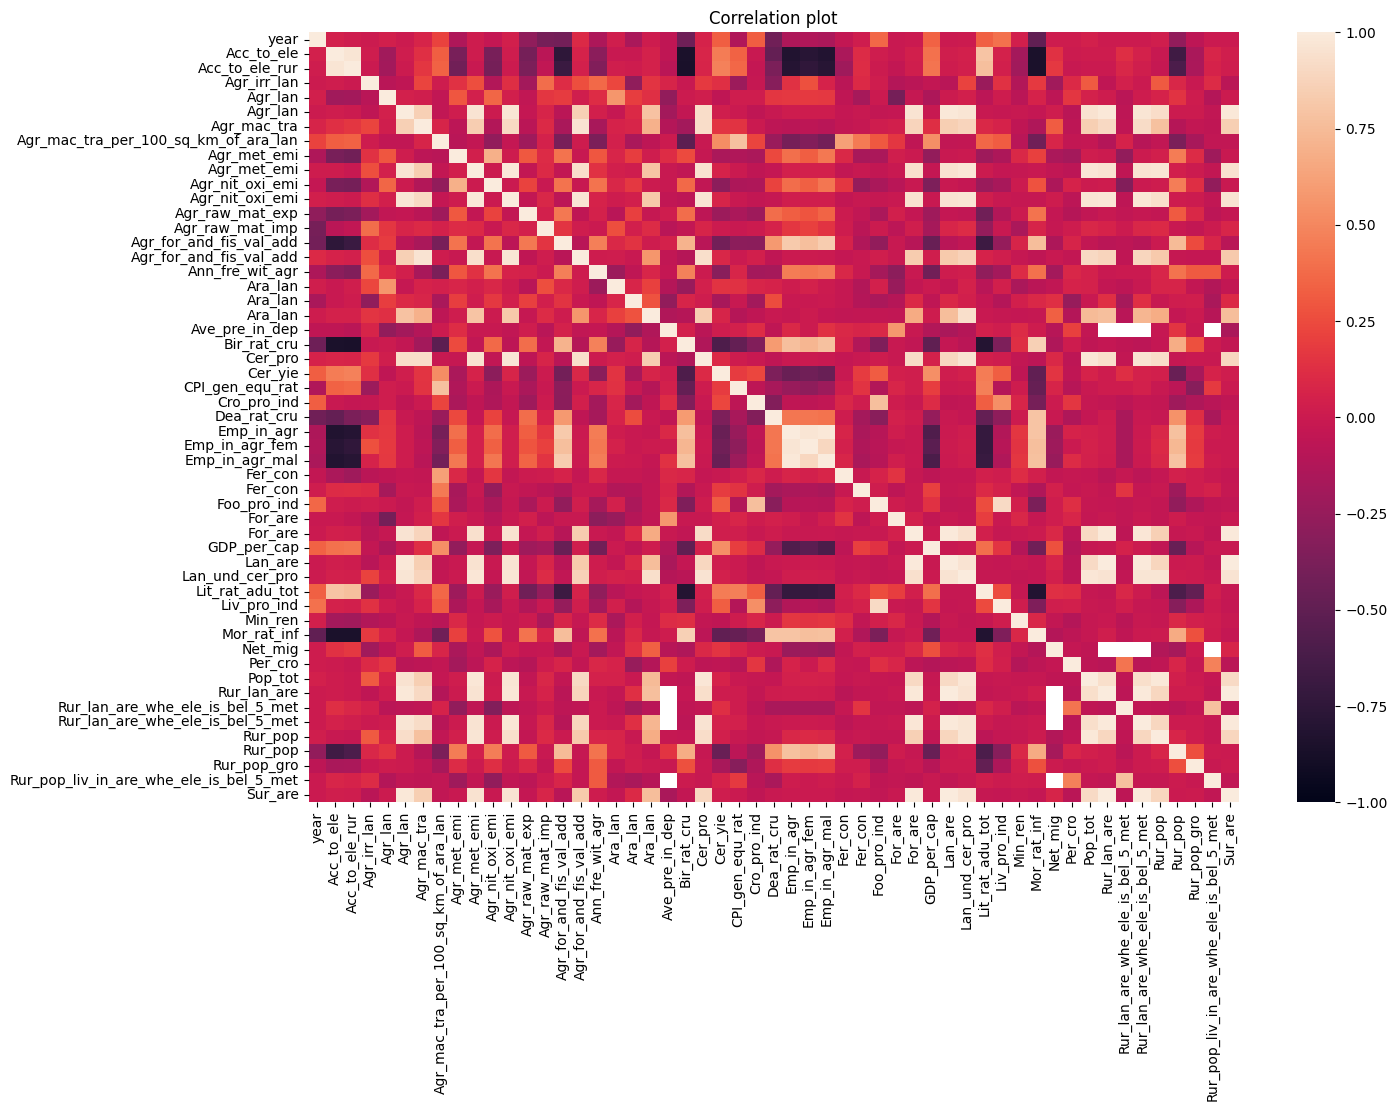

In [22]:
def process_name(name):
    name = name.split(' (')[0]\
        .replace(" ", "_")\
        .replace(',','')\
        .replace('.','')
    names = name.split('_')
    if len(names) < 2: return name[:6]
    names = [nam[:3] for nam in names]
    name = '_'.join(names)
    # print(name)
    return name

short_names = list(map(process_name, df_oig.columns.values))
df_short = df_oig.copy()
df_short.columns = short_names


# heatmap - correlation visualisation
plt.figure(figsize=(15,10))
plt.title("Correlation plot")
sns.heatmap(data=df_short.corr(), annot=False, vmax=1, vmin=-1)

/var/folders/3c/t08nl7456zl9jcq07p2xt7x80000gn/T/ipykernel_48328/2176888686.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df_imputed.corr(), annot=False, vmax=1, vmin=-1)


<AxesSubplot: title={'center': 'Correlation plot'}>

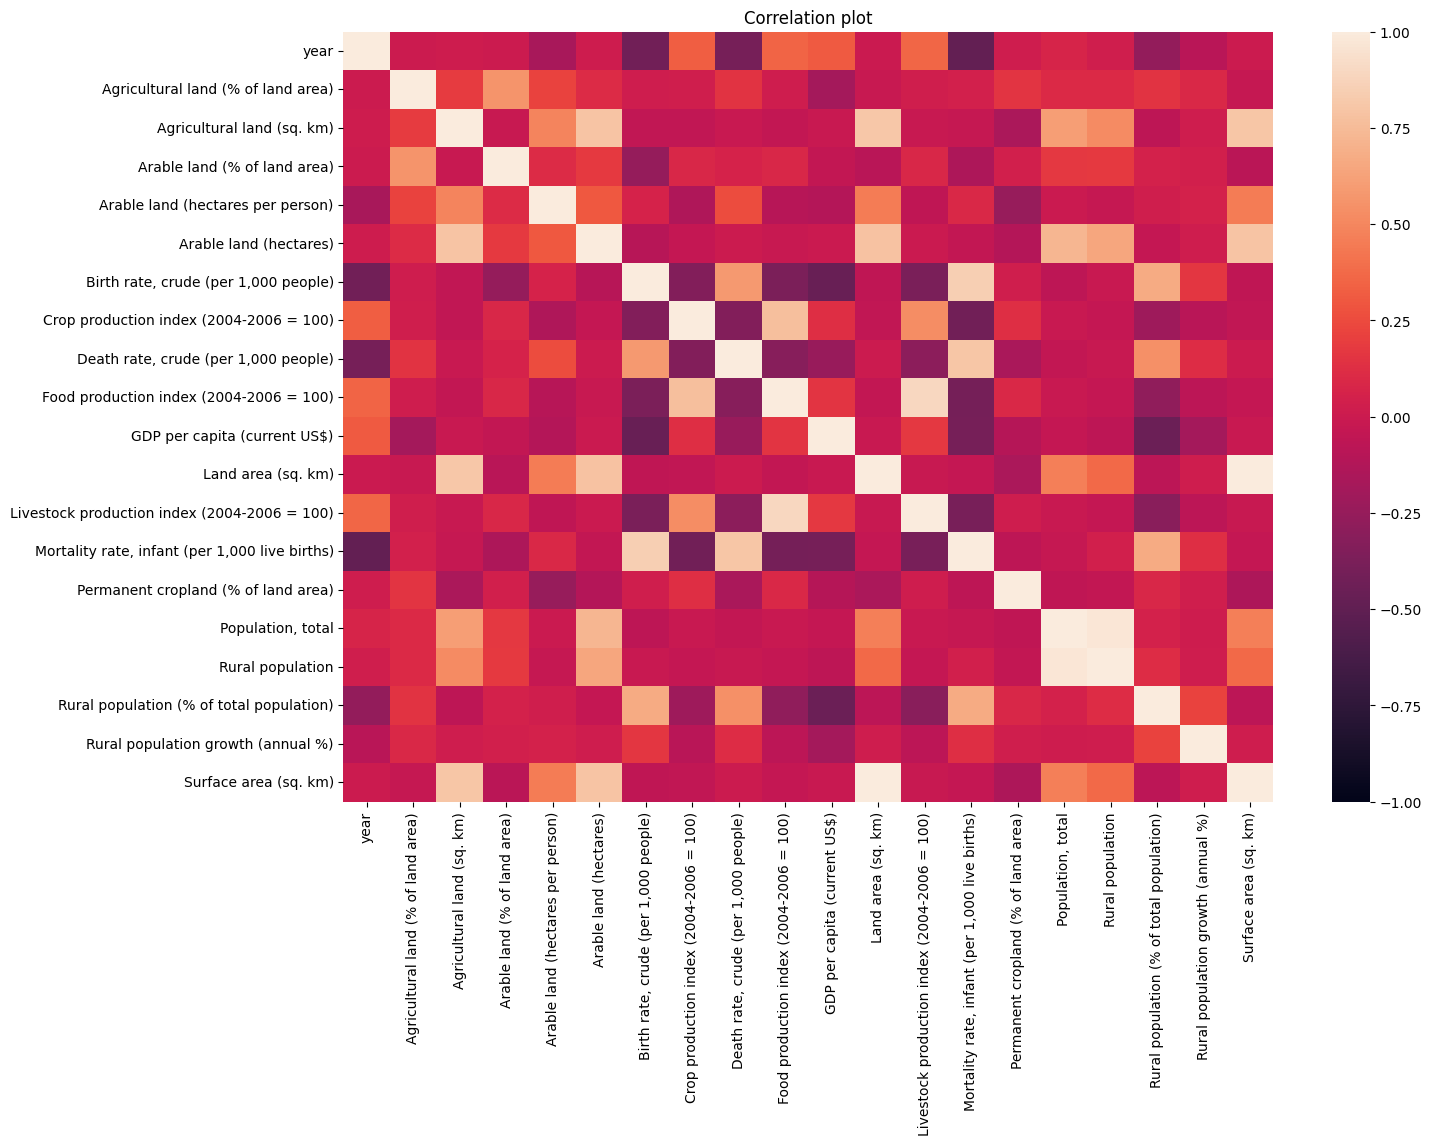

In [21]:
# heatmap - correlation visualisation
plt.figure(figsize=(15,10))
plt.title("Correlation plot")
sns.heatmap(data=df_imputed.corr(), annot=False, vmax=1, vmin=-1)

# Data Semantics Visualisation

# ====================

<AxesSubplot: >

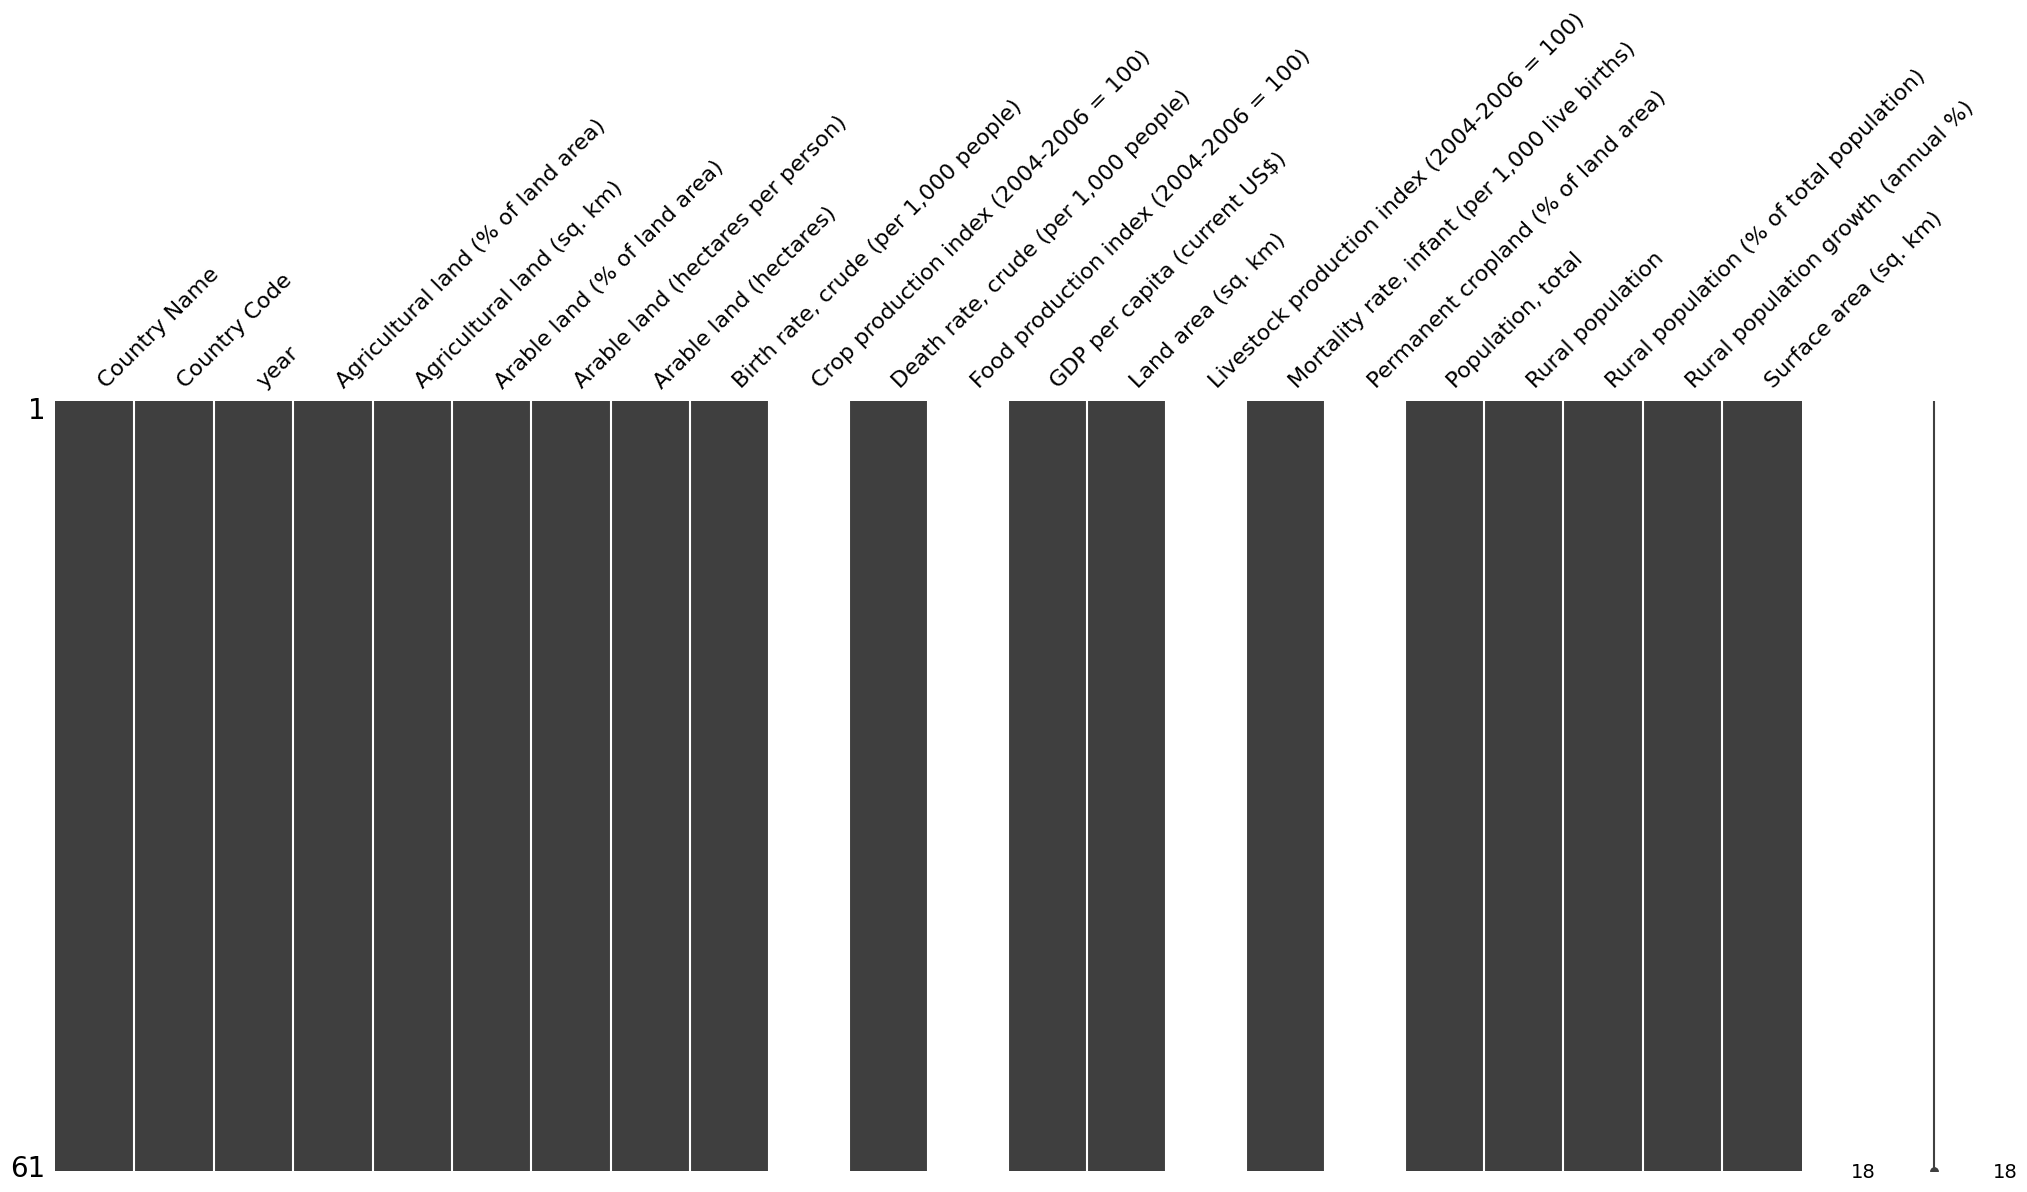

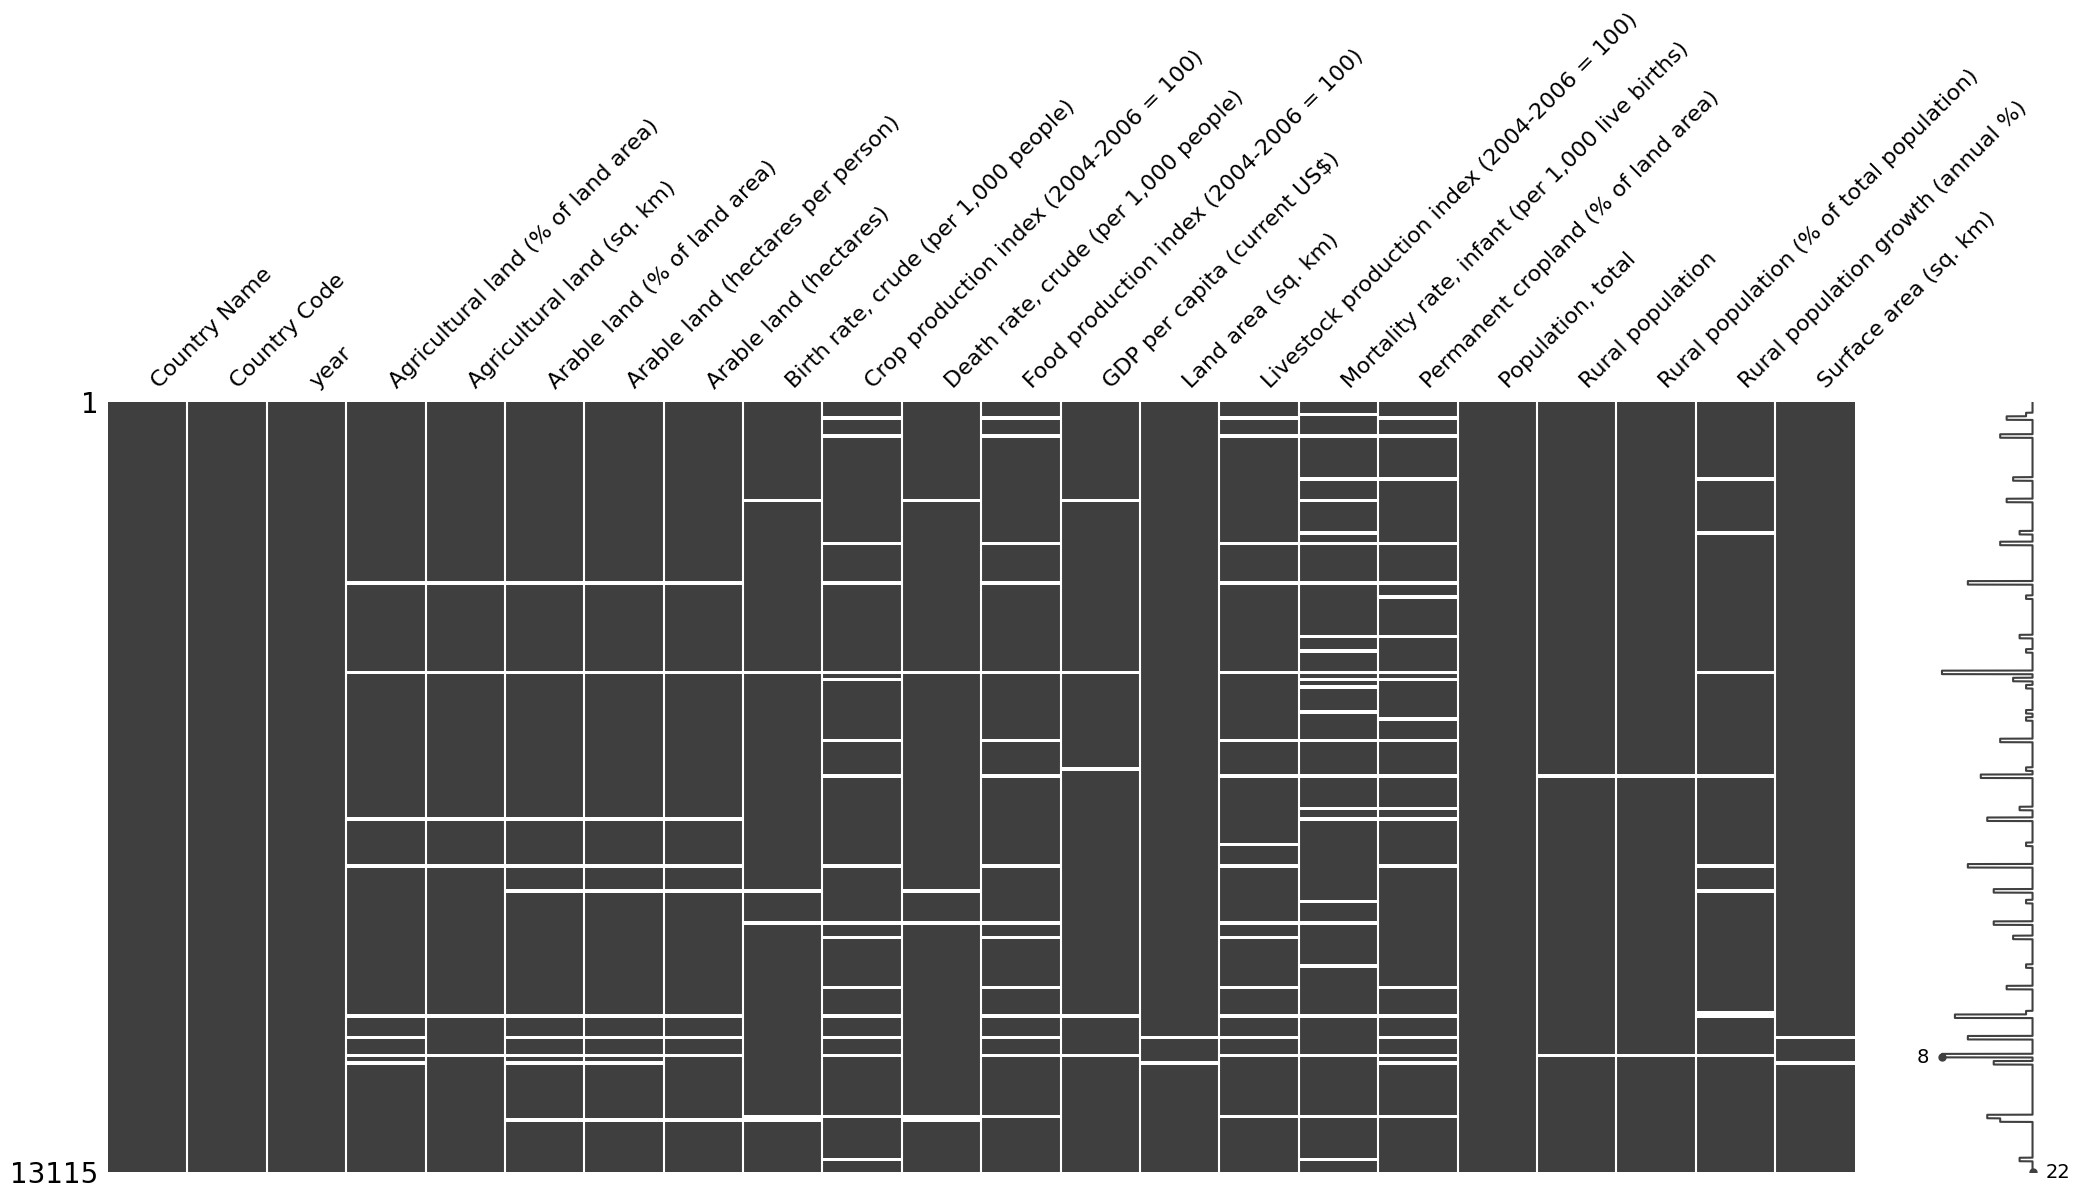

In [201]:
# df_grouped = df_selected.groupby("Country Name", group_keys=True)


country_names = sorted(list(set(df_selected["Country Name"])))
for cn in country_names:
    selected = df_selected.loc[df_selected["Country Name"] == cn,:]
    # print(selected.shape, selected['Country Name'].iloc[0])
    solution = df_selected.loc[df_selected["Country Name"] == cn,:].apply(lambda x: myImputation(x), axis=0)
    df_selected.loc[df_selected["Country Name"] == cn,:] = solution
msno.matrix(df_selected.loc[df_selected["Country Name"] == country_names[4],:])
msno.matrix(df_selected)


In [203]:
biggest_countries = cleaned.sort_values(by=f"Agricultural land (% of land area)", axis=0, ascending=False).loc[data["year"]==2000]
biggest_countries = biggest_countries[:10]
fig = plt.figure()

plt.bar(biggest_countries["Country Name"],
       biggest_countries[f"Agricultural land (% of land area)"])
#plt.show()

NameError: name 'cleaned' is not defined

In [ ]:
# shorten column names
names = df.columns.values

def process_name(name):
    name = name.split(' (')[0]\
        .replace(" ", "_")\
        .replace(',','')\
        .replace('.','')
    names = name.split('_')
    if len(names) < 2: return name[:6]
    names = [nam[:3] for nam in names]
    name = '_'.join(names)
    # print(name)
    return name

short_names = list(map(process_name, names))

# df.columns = short_names

In [48]:
print(len(string))
string = """
______ _ , - - . _ . - ,
______/ \ _ r - , \ _  )
. - . )   _ ; = ' _ /   ( . ;
____\   \\ '           \ / S  )
_____L . ' - .   _ . ' | - '
__< _ ` - ' \\ ' _ . ' /
_______` ' - . _ ( \\
_______ _ _ _       \\\ ,             _ _ _
_______\   . ' - .   \\\       . - ' _ .   /
________' . _ '   ' . \\ \ / . - ' _ . '
_____________' - - ` ` \ ( ' - - '
________________________\\\\
_______ 1 / 1 0 0 ______`\\\,
__________________________\|
"""
# string = string.replace(' ', '_')
print(string)


string_2 = string.split()
print(' '.join(string_2))

432

       _ , - - . _ . - ,
      / \ _ r - , \ _  )
. - . )   _ ; = ' _ /   ( . ;
   \   \ '           \ / S  )
     L . ' - .   _ . ' | - '
  < _ ` - ' \ ' _ . ' /
       ` ' - . _ ( \
_______ _ _ _       \\ ,             _ _ _
_______\   . ' - .   \\       . - ' _ .   /
________' . _ '   ' . \ \ / . - ' _ . '
_____________' - - ` ` \ ( ' - - '
________________________\\
_______ 1 / 1 0 0 ______`\\,
__________________________\|

_ , - - . _ . - , / \ _ r - , \ _ ) . - . ) _ ; = ' _ / ( . ; \ \ ' \ / S ) L . ' - . _ . ' | - ' < _ ` - ' \ ' _ . ' / ` ' - . _ ( \ _______ _ _ _ \\ , _ _ _ _______\ . ' - . \\ . - ' _ . / ________' . _ ' ' . \ \ / . - ' _ . ' _____________' - - ` ` \ ( ' - - ' ________________________\\ _______ 1 / 1 0 0 ______`\\, __________________________\|
